Copyright © 2025 Technical University of Denmark

In [163]:
from lcg_plus.base import State
from lcg_plus.operations.symplectic import squeezing, two_mode_squeezing, beam_splitter
import numpy as np
from lcg_plus.plotting import plot_wigner_marginals
from lcg_plus.states.coherent import gen_fock_superpos_coherent
from lcg_plus.states.nongauss import prepare_fock_coherent, prepare_sqz_cat_coherent
import matplotlib as mpl
from matplotlib import pyplot as plt

colwidth = 3.41667
fs = 10
mpl.rcParams.update({'font.size': fs, 
                     "text.usetex":  True, 
                     'font.family':'serif',
                     'xtick.labelsize': 8, 
                     'ytick.labelsize':8 })

fig_kwargs = {'dpi':800, 'bbox_inches': 'tight'}

# Create a zoo of non-Gaussian states

(0.9999721956509185-1.8300416472819566e-16j)


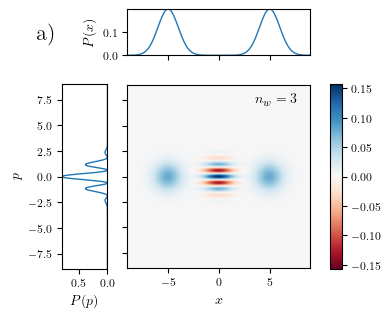

In [245]:
#Cat state
alpha = 5/2
cat = prepare_sqz_cat_coherent(0, alpha, 0, fast =True)
cat.get_norm()
x = np.linspace(-9,9,300)
Wcat = cat.get_wigner_log(x,x)
print(np.sum(Wcat*np.diff(x)[-1]**2))
fig, ax, axx, axp, axc = plot_wigner_marginals(Wcat.real,x,x)
axx.text(-0.5, 1.25, 'a)', fontsize = 16, transform=ax.transAxes)
ax.text(0.7,0.9,rf'$n_w={cat.num_weights}$',transform=ax.transAxes)
fig.savefig('thesis_figures/W_cat.pdf', **fig_kwargs)
plt.show()

(0.9992911627211893-1.0462550964485118e-16j)


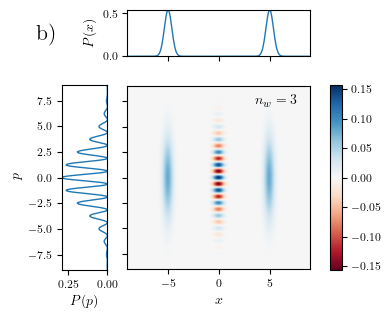

In [246]:
#Squeezed cat state

r = 1
cat = prepare_sqz_cat_coherent(r, alpha * np.exp(r), 0, fast=True)
cat.get_norm()
x = np.linspace(-9,9,300)
Wsqcat = cat.get_wigner_log(x,x)
print(np.sum(Wsqcat*np.diff(x)[-1]**2))
fig, ax, axx, axp, axc = plot_wigner_marginals(Wsqcat.real,x,x)
axx.text(-0.5, 1.25, 'b)', fontsize = 16, transform=ax.transAxes)
ax.text(0.7,0.9,rf'$n_w={cat.num_weights}$',transform=ax.transAxes)
fig.savefig('thesis_figures/W_sqcat.pdf', **fig_kwargs)
plt.show()

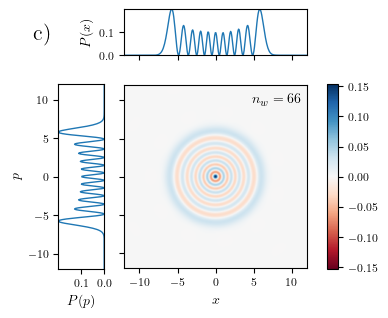

In [247]:
# Photon number state

fock = prepare_fock_coherent(10)

x = np.linspace(-12,12,300)
Wfock = fock.get_wigner_log(x,x)

fig, ax, axx, axp, axc = plot_wigner_marginals(Wfock.real,x,x)
axx.text(-0.5, 1.25, 'c)', fontsize = 16, transform=ax.transAxes)
ax.text(0.7,0.9,rf'$n_w={fock.num_weights}$',transform=ax.transAxes)
fig.savefig('thesis_figures/W_fock.pdf', **fig_kwargs)
plt.show()

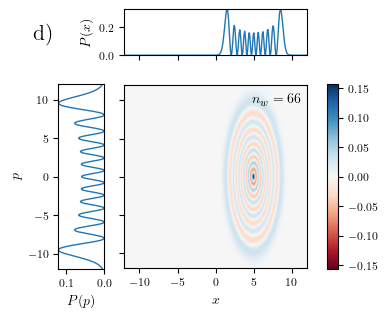

In [248]:
# Displaced, squeezed photon number state
r = 0.5
alpha = 2.5
fock = prepare_fock_coherent(10)
fock.apply_symplectic(squeezing(r,0))

disp = np.sqrt(2*fock.hbar)*np.array([alpha.real, alpha.imag])
fock.apply_displacement(disp)

x = np.linspace(-12,12,300)
Wfock_sq_disp = fock.get_wigner_log(x,x)

fig, ax, axx, axp, axc = plot_wigner_marginals(Wfock_sq_disp.real,x,x)
axx.text(-0.5, 1.25, 'd)', fontsize = 16, transform=ax.transAxes)
ax.text(0.7,0.9,rf'$n_w={fock.num_weights}$',transform=ax.transAxes)
fig.savefig('thesis_figures/W_sq_disp_fock.pdf', **fig_kwargs)
plt.show()


(0.9999999997985618-1034.2581242060091j)


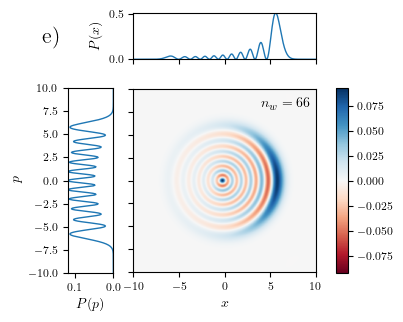

In [261]:
# Binomial state
from scipy.special import comb
def binom_coeffs(eta, M):
    ns = np.arange(M+1)
    return np.sqrt(comb(M,ns) * eta **ns * (1-eta)**(M-ns))

M = 10
eta = 0.95

fock_coeffs = binom_coeffs(eta, M)
data = gen_fock_superpos_coherent(fock_coeffs, 1e-4)
binom = State(1)
binom.update_data(data)
binom.get_norm()
x = np.linspace(-10,10,300)
Wbinom = binom.get_wigner_log(x,x)
print( np.sum(Wbinom)*np.diff(x)[-1]**2)
fig, ax, axx, axp, axc = plot_wigner_marginals(Wbinom.real,x,x)
axx.text(-0.5, 1.25, 'e)', fontsize = 16, transform=ax.transAxes)
ax.text(0.7,0.9,rf'$n_w={binom.num_weights}$',transform=ax.transAxes)
#fig.savefig('thesis_figures/W_binom.pdf', **fig_kwargs)
plt.show()


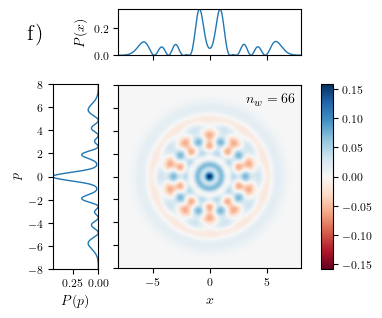

In [250]:
# ON state
n = 10

fock_coeffs = np.zeros(n+1)
fock_coeffs[0] = 1
fock_coeffs[-1] = 1
data = gen_fock_superpos_coherent(fock_coeffs, 1e-4)
on = State(1)
on.update_data(data)
on.get_norm()
x = np.linspace(-8,8,300)
Won = on.get_wigner_log(x,x)
fig, ax, axx, axp, axc = plot_wigner_marginals(Won.real,x,x)
axx.text(-0.5, 1.25, 'f)', fontsize = 16, transform=ax.transAxes)
ax.text(0.7,0.9,rf'$n_w={on.num_weights}$',transform=ax.transAxes)
#fig.savefig('thesis_figures/W_on.pdf', **fig_kwargs)
plt.show()

0.00032831326586334577


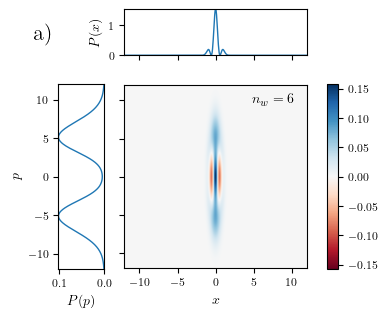

In [313]:
#Photon subtraction

theta = np.arccos(np.sqrt(0.99))
#theta = np.pi/4

n = 2
r = 1

state = State(2)
state.apply_symplectic_fast(squeezing(r,0), [0])
state.apply_symplectic(beam_splitter(theta,0))



state.post_select_fock_coherent(1, n)
print(state.norm)
x = np.linspace(-12,12,500)
Wsub = state.get_wigner_log(x,x)
fig, ax, axx, axp, axc = plot_wigner_marginals(Wsub.real,x,x)
if theta == np.arccos(np.sqrt(0.99)):
    axx.text(-0.5, 1.25, 'a)', fontsize = 16, transform=ax.transAxes)
    plt.savefig('thesis_figures/W_sub.pdf', **fig_kwargs)
else:
    axx.text(-0.5, 1.25, 'd)', fontsize = 16, transform=ax.transAxes)
    plt.savefig('thesis_figures/W_gensub.pdf', **fig_kwargs)
    
ax.text(0.7,0.9,rf'$n_w={state.num_weights}$',transform=ax.transAxes)
plt.show()

0.03817597789657326


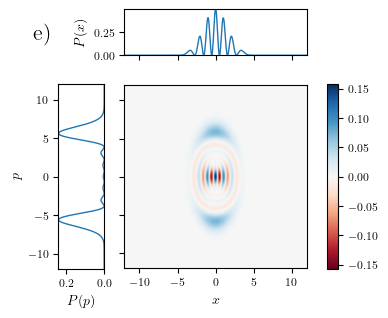

In [356]:
#Photon addition
state = State(2)
r = 1
r2 = 0.001
n = 2

r = 1
r2 = 1
n = 6

state.apply_symplectic_fast(squeezing(r,0), [0])
state.apply_symplectic(two_mode_squeezing(r2,0))

state.post_select_fock_coherent(1,n, 1e-5)
print(state.norm)
x = np.linspace(-12,12,500)
W = state.get_wigner_log(x,x)
fig, ax, axx, axp, axc = plot_wigner_marginals(W.real,x,x)

if r2 == 0.001:
    axx.text(-0.5, 1.25, 'b)', fontsize = 16, transform=ax.transAxes)
    plt.savefig('thesis_figures/W_add.pdf', **fig_kwargs)
else:
    axx.text(-0.5, 1.25, 'e)', fontsize = 16, transform=ax.transAxes)
    plt.savefig('thesis_figures/W_genadd.pdf', **fig_kwargs)
    

plt.show()

1
0.02294617693679852


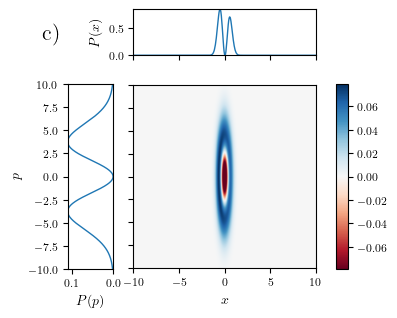

In [353]:
#Photon catalysis
state = State(1)
r = 1
theta = np.arccos(np.sqrt(0.99))
n = 1
#n = 2

state.apply_symplectic(squeezing(r,0))
state.add_state(prepare_fock_coherent(n))
print(state.norm)
state.apply_symplectic(beam_splitter(theta,0))

state.post_select_fock_coherent(1,0)
x = np.linspace(-10,10,400)
W = state.get_wigner_log(x,x)
fig, ax, axx, axp, axc = plot_wigner_marginals(W.real,x,x)
print(state.norm)

if n==1:
    axx.text(-0.5, 1.25, 'c)', fontsize = 16, transform=ax.transAxes)
    plt.savefig('thesis_figures/W_catalysis.pdf', **fig_kwargs)
else:
    axx.text(-0.5, 1.25, 'f)', fontsize = 16, transform=ax.transAxes)
    plt.savefig('thesis_figures/W_gencat.pdf', **fig_kwargs) 

plt.show()

0.48735459946540327


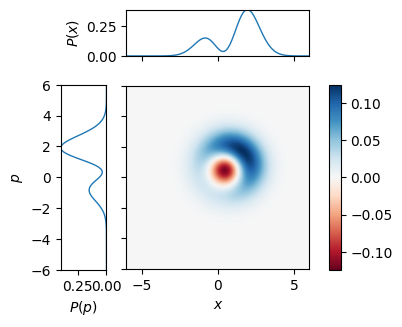

In [53]:
#Photon-added coherent state

state = State(1)
alpha = 0.5+0.5j

state.add_state(prepare_fock_coherent(1))

state.apply_displacement(np.sqrt(2*state.hbar)*np.array([alpha.real, alpha.imag,0,0]))
state.apply_symplectic(beam_splitter(np.pi/4,0))
state.post_select_fock_coherent(1,0)

x = np.linspace(-6,6,100)
W = state.get_wigner_log(x,x)
fig, ax, axx, axp, axc = plot_wigner_marginals(W.real,x,x)
print(state.norm)